##Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf

##Importing the dataset

In [2]:
import yfinance as yf
df = yf.download("RELIANCE.NS", start="2016-12-20", end="2021-10-03")
print(df.head())

/tmp/ipython-input-2-2749319623.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", start="2016-12-20", end="2021-10-03")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2016-12-20  232.736679  233.418670  231.691685  232.032688    11688169
2016-12-21  233.913666  234.804665  232.582682  233.220675    20367894
2016-12-22  231.735687  233.781676  231.207691  232.758682    28892834
2016-12-23  232.604691  235.167676  231.438686  231.438686    10265033
2016-12-26  230.437698  234.518677  229.821705  231.955691    15321770


In [3]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
print(df.head())

Price             Open        High         Low       Close      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2016-12-20  232.032688  233.418670  231.691685  232.736679    11688169
2016-12-21  233.220675  234.804665  232.582682  233.913666    20367894
2016-12-22  232.758682  233.781676  231.207691  231.735687    28892834
2016-12-23  231.438686  235.167676  231.438686  232.604691    10265033
2016-12-26  231.955691  234.518677  229.821705  230.437698    15321770


In [4]:
df.shape

(1183, 5)

## Plotting the close price curve

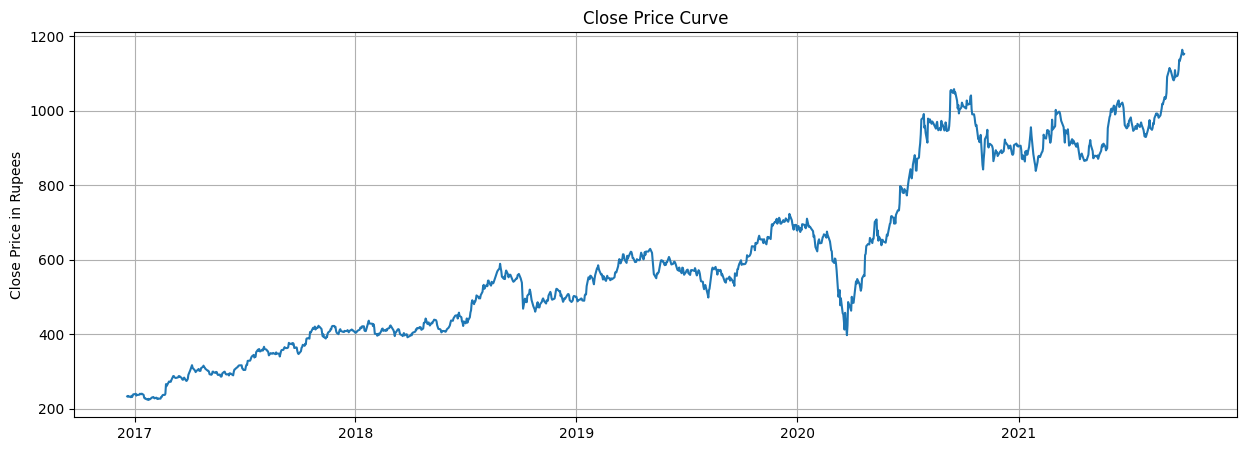

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"])
plt.ylabel("Close Price in Rupees")
plt.title("Close Price Curve")
plt.grid()
plt.show()

##Distribution plot of Continuous variable

/tmp/ipython-input-6-69190622.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df[feat])
/tmp/ipython-input-6-69190622.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df[feat])
/tmp/ipython-input-6-69190622.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in se

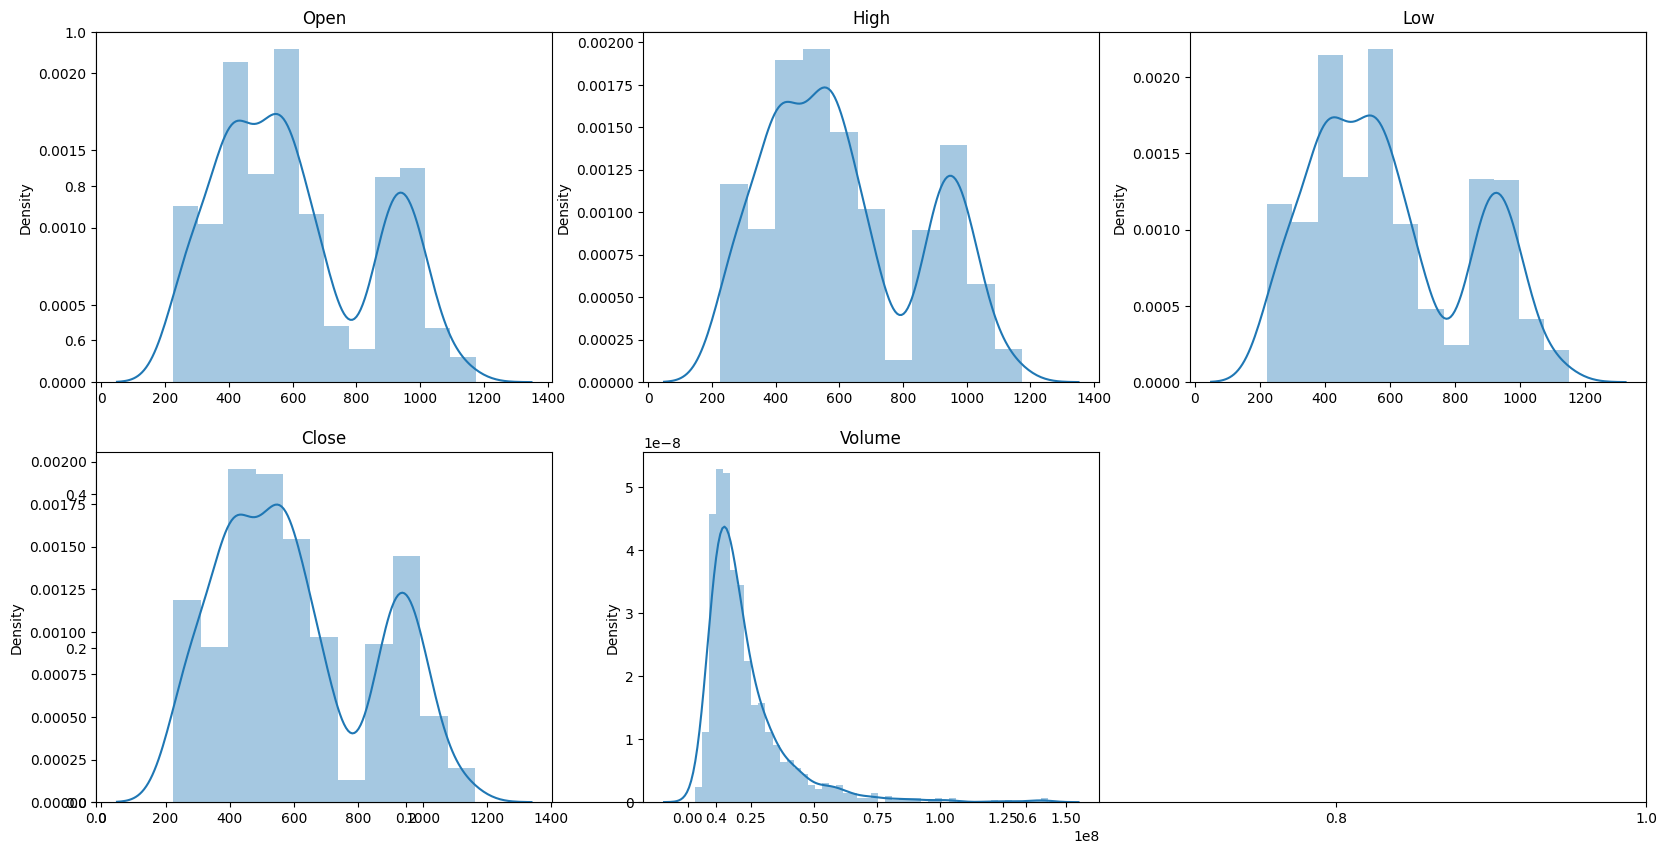

In [6]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, feat in enumerate(features):
  plt.subplot(2,3,i+1)
  sbn.distplot(df[feat])
  plt.title(feat)
plt.show()

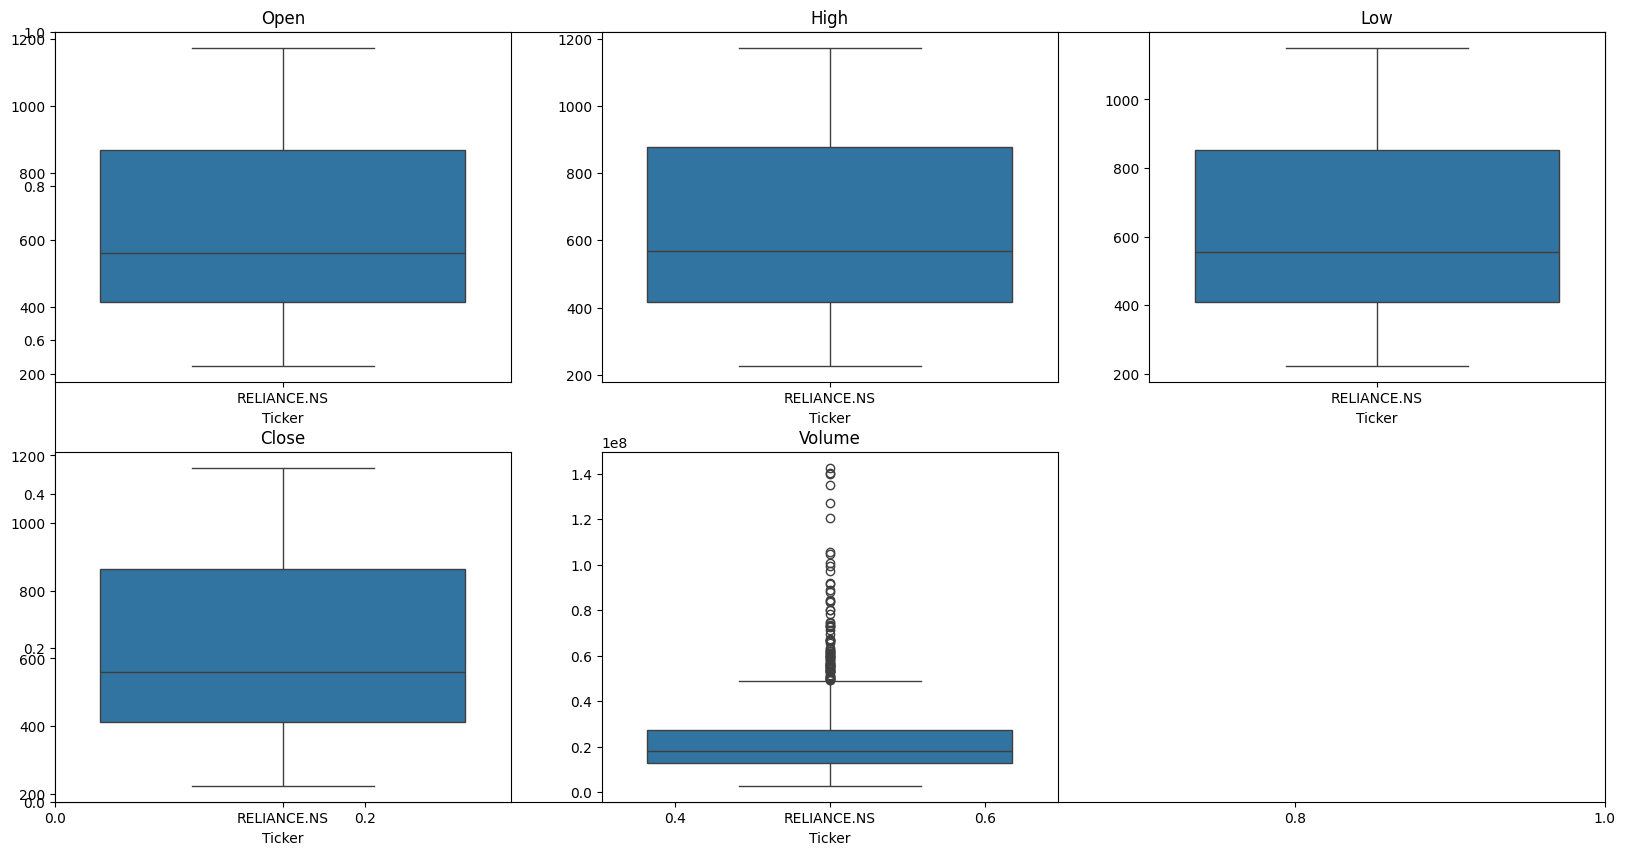

In [7]:
plt.subplots(figsize=(20,10))
for i, feat in enumerate(features):
  plt.subplot(2,3,i+1)
  sbn.boxplot(df[feat])
  plt.title(feat)
plt.show()

##Feature Engineering

In [8]:
def add_technical_indicators(df):
    df['MA5'] = df['Close'].shift(1).rolling(window=5).mean()
    df['MA10'] = df['Close'].shift(1).rolling(window=10).mean()
    df = df.dropna()
    return df

In [9]:
df = add_technical_indicators(df)

df.head()

Price,Open,High,Low,Close,Volume,MA5,MA10
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,
2017-01-03,239.765653,241.338643,237.840660,239.666641,6434204,235.282068,233.783876
2017-01-04,240.436651,240.458650,234.144689,234.771683,10392483,236.368860,234.476872
2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562674
2017-01-06,236.322677,238.698669,236.080670,236.487671,7845839,237.662451,235.091769
2017-01-09,236.938641,238.918632,235.618657,237.092636,5228980,237.334656,235.480067


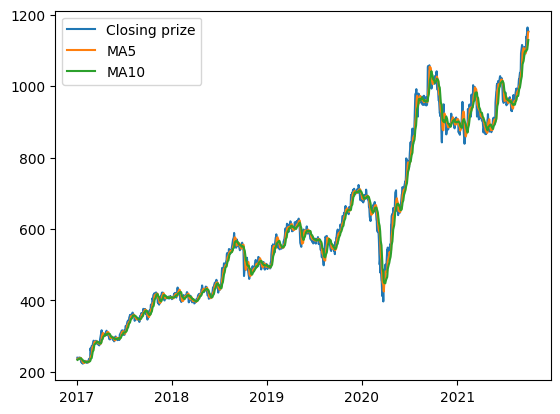

In [10]:
plt.plot(df['Close'], label='Closing prize')
plt.plot(df['MA5'], label='MA5')
plt.plot(df['MA10'], label='MA10')
# plt.plot(df['MA200'], label='MA200')
plt.legend()
plt.show()

##Adding News Sentiment in the dataframe

In [11]:
df1=pd.read_csv('Reliance_News_Sentiment.csv', parse_dates=['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1.head()

,Date,News,Sentimentlabel
0,2017-01-03,Get ready for some fund manager churning. Meen...,-1.0
1,2017-01-04,The Financial ExpressReliance Jio has announce...,1.0
2,2017-01-06,MUMBAI: Reliance Retail is launching stores wh...,0.0
3,2017-01-07,The Financial ExpressAhead of the government a...,-1.0
4,2017-01-08,The Financial ExpressIndian markets are likely...,1.0


In [12]:
df = df.reset_index()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df = df[df['Date'] != 'Ticker']
df = df.copy()

In [15]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume','MA5', 'MA10']

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,MA5,MA10
0,2017-01-03,239.765653,241.338643,237.840660,239.666641,6434204,235.282068,233.783876
1,2017-01-04,240.436651,240.458650,234.144689,234.771683,10392483,236.368860,234.476872
2,2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562674
3,2017-01-06,236.322677,238.698669,236.080670,236.487671,7845839,237.662451,235.091769
4,2017-01-09,236.938641,238.918632,235.618657,237.092636,5228980,237.334656,235.480067


In [17]:
merged_df = pd.merge(df, df1,on='Date', how='left')

In [18]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,MA5,MA10,News,Sentimentlabel
0,2017-01-03,239.765653,241.338643,237.840660,239.666641,6434204,235.282068,233.783876,Get ready for some fund manager churning. Meen...,-1.0
1,2017-01-04,240.436651,240.458650,234.144689,234.771683,10392483,236.368860,234.476872,The Financial ExpressReliance Jio has announce...,1.0
2,2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562674,NaN,NaN
3,2017-01-06,236.322677,238.698669,236.080670,236.487671,7845839,237.662451,235.091769,MUMBAI: Reliance Retail is launching stores wh...,0.0
4,2017-01-09,236.938641,238.918632,235.618657,237.092636,5228980,237.334656,235.480067,NaN,NaN


In [19]:
merged_df['Sentimentlabel'] = merged_df['Sentimentlabel'].shift(1)

In [20]:
merged_df['Sentimentlabel'] = merged_df['Sentimentlabel'].fillna(0)

In [21]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,MA5,MA10,News,Sentimentlabel
0,2017-01-03,239.765653,241.338643,237.840660,239.666641,6434204,235.282068,233.783876,Get ready for some fund manager churning. Meen...,0.0
1,2017-01-04,240.436651,240.458650,234.144689,234.771683,10392483,236.368860,234.476872,The Financial ExpressReliance Jio has announce...,-1.0
2,2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562674,NaN,1.0
3,2017-01-06,236.322677,238.698669,236.080670,236.487671,7845839,237.662451,235.091769,MUMBAI: Reliance Retail is launching stores wh...,0.0
4,2017-01-09,236.938641,238.918632,235.618657,237.092636,5228980,237.334656,235.480067,NaN,0.0


## Data Processing

In [22]:
x = merged_df[['Open', 'Volume','MA5', 'MA10', 'Sentimentlabel']].values
y= merged_df['Close'].values

### Splitting the dataset into training set & test set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, shuffle=False)

###Feature scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# from sklearn.preprocessing import MinMaxScaler
# # Step 1: Select relevant columns
# features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentimentlabel']
# df_model = merged_df[features].copy()

# # Step 2: Fill missing values (just in case)
# df_model = df_model.fillna(0)

# # Step 3: Normalize features
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df_model)

# # Step 4: Create time series data
# def create_sequences(data, window_size):
#     X, y = [], []
#     for i in range(window_size, len(data)-1):
#         X.append(data[i-window_size:i])
#         y.append(data[i+1][3])  # index 3 = 'Close'
#     return np.array(X), np.array(y)

# window_size = 30  # use past 30 days
# X, y = create_sequences(scaled_data, window_size)

# # Step 5: Train-test split
# split_index = int(0.8 * len(X))
# x_train, x_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]


## Training the Random Forest Regression Model on the training set

In [26]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=0)
# model.fit(x_train, y_train)

##Adding Neural Network for the trainig

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

In [30]:
model.fit(x_train, y_train, epochs=350, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/350
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 372369.1875 - r2_score: -7.1509 - val_loss: 963021.0000 - val_r2_score: -160.3091
Epoch 2/350
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 351953.7812 - r2_score: -7.1859 - val_loss: 915452.4375 - val_r2_score: -152.3412
Epoch 3/350
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 320160.8750 - r2_score: -6.6298 - val_loss: 625592.6875 - val_r2_score: -103.7888
Epoch 4/350
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165922.3438 - r2_score: -2.5789 - val_loss: 47615.4297 - val_r2_score: -6.9757
Epoch 5/350
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9283.0176 - r2_score: 0.7946 - val_loss: 14564.5957 - val_r2_score: -1.4396
Epoch 6/350
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6770.2393 - r2_score: 0.8469 - val_loss: 10105.9395 - val_r2_score: -0.6928
Epoch 7/350
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5077.8213 - r2_score: 0.8920 - val_loss: 6823.1318 - val_r2_score: -0.1429
Epoch 8/350
33/33 ━━━━━━━━━━━━━━━━

## Adding LSTM for training

In [31]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [32]:
x_train.shape[0]

1055

In [33]:
# model = Sequential([
#     LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
#     Dropout(0.2),
#     LSTM(32),
#     Dropout(0.2),
#     Dense(1)
# ])

In [34]:
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

In [35]:
# model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

##Evaluating the model

In [36]:
y_predict = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [37]:
mse = mean_squared_error(y_test, y_predict)
mbe = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mbe)
print('R2 Square: ', r2)

Mean Squared Error:  154.63217673507535
Mean Absolute Error:  9.451020838850635
R2 Square:  0.9740986008459526


##Plotting the Prediction

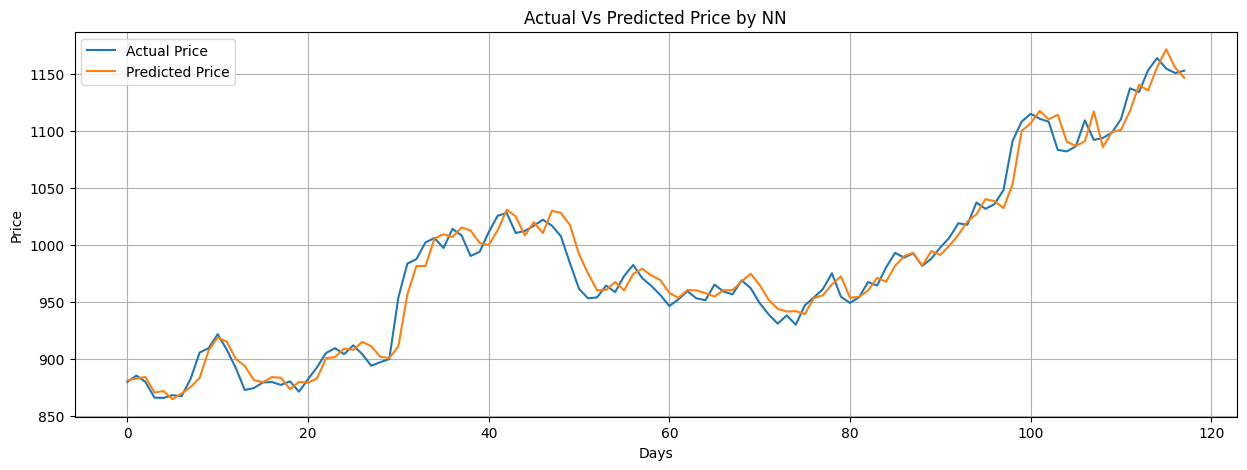

In [38]:
plt.figure(figsize=(15,5))
plt.plot(y_test, label='Actual Price')
plt.plot(y_predict, label='Predicted Price')
plt.legend()
plt.title("Actual Vs Predicted Price by NN")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid()
plt.show()

##Predict closing price of the stock within a month

In [39]:
input_date_str=input(print('Date in YYYY-MM-DD:'))

Date in YYYY-MM-DD:
None2025-07-16


In [40]:
from datetime import datetime, timedelta
try:
    input_date = datetime.strptime(input_date_str, "%Y-%m-%d")
    print("You entered:", input_date)
    data = yf.download("RELIANCE.NS", start=input_date_str, end=(input_date + timedelta(days=1)).strftime("%Y-%m-%d"))
except ValueError:
    print("Invalid date format! Please use YYYY-MM-DD.")


/tmp/ipython-input-40-1929226015.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("RELIANCE.NS", start=input_date_str, end=(input_date + timedelta(days=1)).strftime("%Y-%m-%d"))
[*********************100%***********************]  1 of 1 completed

You entered: 2025-07-16 00:00:00


In [41]:
if data.empty:
  print("No stock data available for the given date.")
else:
  open_price = data['Open'].values[0]
  volume = data['Volume'].values[0]
  close_price = data['Close'].values[0]
  print(f"\n📈 Market Data on {input_date_str}:")
  print(f"Open: {open_price}, Volume: {volume}, Close: {close_price}")


📈 Market Data on 2025-07-16:
Open: [1473.], Volume: [10409983], Close: [1485.59997559]


In [42]:
start_date=input_date-timedelta(14)
df5=yf.download("RELIANCE.NS",  start=start_date, end=input_date)
df5.head()

/tmp/ipython-input-42-997837926.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df5=yf.download("RELIANCE.NS",  start=start_date, end=input_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-07-02,1518.800049,1530.000000,1508.699951,1528.400024,6361002
2025-07-03,1517.800049,1531.900024,1513.000000,1520.800049,11283291
2025-07-04,1527.300049,1530.000000,1517.199951,1524.000000,6603501
2025-07-07,1541.500000,1544.800049,1525.000000,1526.599976,7251074
2025-07-08,1537.599976,1544.900024,1530.199951,1536.000000,7171261


In [43]:
a=df5['Close'].values

In [44]:
Ma5=sum(a[-10:5])/5
Ma10=sum(a)/10
print(Ma10)
print(Ma5)

[1514.35]
[1528.60002441]


In [45]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Reliance&'
       'from=input_date_str&'
       'to=(input_date + timedelta(days=1)).strftime("%Y-%m-%d")&'
       'sortBy=StockMarket&'
       'apiKey=c69dfcb734db4a70936f6a4b387c9820')

response = requests.get(url)
data1 = response.json()
headline = [article['title'] for article in data1 ['articles']]


In [46]:
print(headline)

["Apple Remains in Trump's Crosshairs as Trade Advisor Again Criticizes China Reliance", "Nike plans 'surgical' price increases as it expects $1 billion hit from tariffs", "A CEO explains how he cut his battery chain's reliance on China and plans to offset the latest tariffs", 'Japan must reduce reliance on US trade, opposition head says', "The Israel-Iran conflict is likely bad news for Russia's reliance on Shahed drones, UK intel says", "Dassault, Anil Ambani's Reliance to make Falcon 2000 business jets in India", 'How the Glucose Monitor Became a MAHA Fixation', 'Denmark Switches from Microsoft to LibreOffice and Linux', 'China successfully tests home-grown OS in space to reduce foreign software dependence', "Apple Smart Glasses: Everything We Know About Apple's Answer to Meta Ray-Bans", 'Carbon Record Reveals Evidence of Extensive Human Fire Use 50,000 Years Ago', "I lost my software engineer job in May and have taken up welding. I'm happy to leave the tech industry — AI has change

In [47]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_scores(headline):
    analyzer = SentimentIntensityAnalyzer()
    scores = [analyzer.polarity_scores(headline)['compound'] for headline in headline]
    return sum(scores) / len(scores) if scores else 0

In [49]:
sentiment = get_sentiment_scores(headline)
print(sentiment)

0.06291500000000003


In [50]:
new_df=[open_price, volume,Ma5, Ma10, sentiment]
new_df = [x.item() if isinstance(x, np.ndarray) else x for x in new_df]
print(new_df)

[1473.0, 10409983, 1528.6000244140625, 1514.35, 0.06291500000000003]


In [51]:
print(model.predict(sc.transform([new_df])))
print('Actual Close price:', close_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[1482.8491]]
Actual Close price: [1485.59997559]
